In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


In [ ]:
#Dataset 1: a linearly separable dataset

# Number of samples per class
n_samples_per_class = 100

# Class 0: centered at (-3, -3)
x_class0 = np.random.randn(n_samples_per_class, 2) * 0.5 - 3
y_class0 = np.zeros(n_samples_per_class, dtype=int)

# Class 1: centered at (3, 3)
x_class1 = np.random.randn(n_samples_per_class, 2) * 0.5 + 3
y_class1 = np.ones(n_samples_per_class, dtype=int)

# Combine
X1 = np.vstack((x_class0, x_class1))
y1 = np.concatenate((y_class0, y_class1))


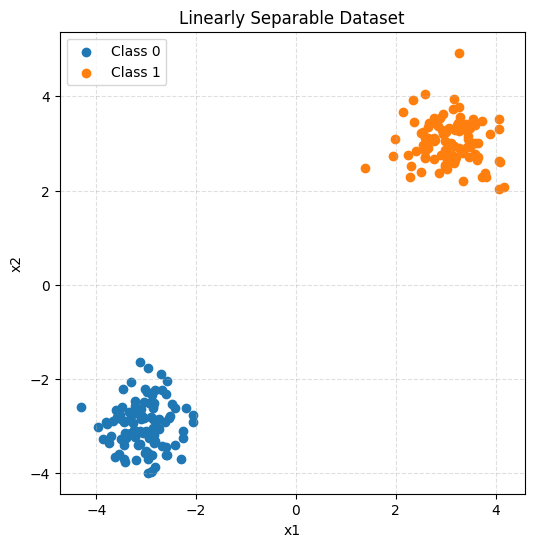

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(X1[y1==0,0], X1[y1==0,1], label="Class 0")
plt.scatter(X1[y1==1,0], X1[y1==1,1], label="Class 1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Linearly Separable Dataset")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


In [ ]:
class Perceptron:
    def __init__(self, lr=0.1, n_epochs=50):
        self.lr = lr
        self.n_epochs = n_epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0.0
        self.errors_ = []

        for _ in range(self.n_epochs):
            errors = 0
            for xi, yi in zip(X, y):
                y_hat = 1 if (np.dot(xi, self.w) + self.b) >= 0 else 0
                update = self.lr * (yi - y_hat)
                if update != 0:
                    self.w += update * xi
                    self.b += update
                    errors += 1
            self.errors_.append(errors)
            if errors == 0:
                break
        return self

    def predict(self, X):
        return (X @ self.w + self.b >= 0).astype(int)


In [ ]:
ppn1 = Perceptron(lr=0.1, n_epochs=50)
ppn1.fit(X1, y1)

accuracy1 = np.mean(ppn1.predict(X1) == y1)
print("Training accuracy (Dataset 1):", accuracy1)


Training accuracy (Dataset 1): 1.0


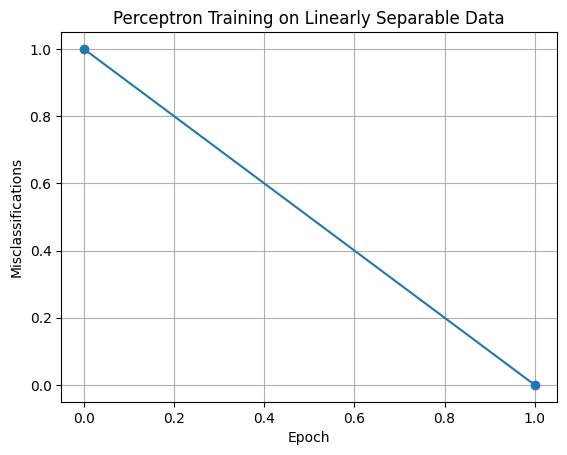

In [ ]:
plt.plot(ppn1.errors_, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Misclassifications")
plt.title("Perceptron Training on Linearly Separable Data")
plt.grid(True)
plt.show()


In [ ]:
# Dataset 2: a model of the XOR problem

X2 = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=float)

y2 = np.array([0, 1, 1, 0], dtype=int)


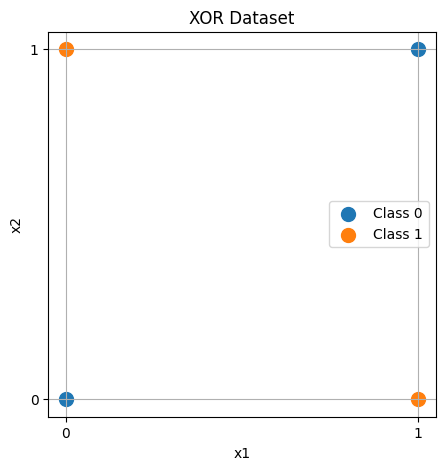

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X2[y2==0,0], X2[y2==0,1], label="Class 0", s=100)
plt.scatter(X2[y2==1,0], X2[y2==1,1], label="Class 1", s=100)
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR Dataset")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# train perceptron on XOR
ppn2 = Perceptron(lr=0.2, n_epochs=50)
ppn2.fit(X2, y2)

accuracy2 = np.mean(ppn2.predict(X2) == y2)
print("Training accuracy (XOR):", accuracy2)
print("Predictions:", ppn2.predict(X2))


Training accuracy (XOR): 0.5
Predictions: [1 1 0 0]


In [ ]:
print("Perceptron on XOR will fail because no single straight line can separate the two classes")

Perceptron on XOR will fail because no single straight line can separate the two classes


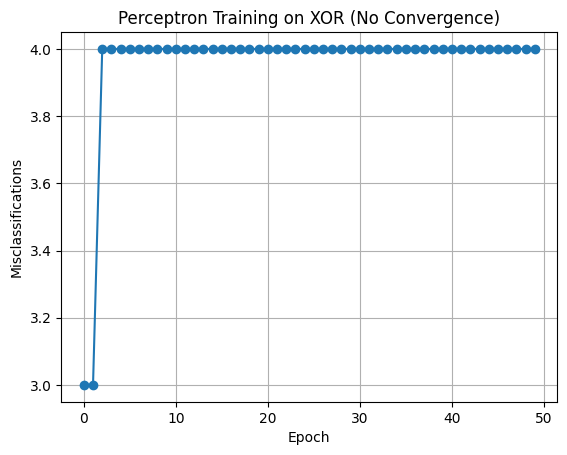

In [ ]:
plt.plot(ppn2.errors_, marker="o")
plt.xlabel("Epoch")
plt.ylabel("Misclassifications")
plt.title("Perceptron Training on XOR (No Convergence)")
plt.grid(True)
plt.show()


In [ ]:
# Extra credit: create a simple model that can be trained to solve XOR

# XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=float)

y = np.array([[0], [1], [1], [0]])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

np.random.seed(1)

# initialization
W1 = np.random.randn(2, 2) * 0.1
b1 = np.zeros((1, 2))
W2 = np.random.randn(2, 1) * 0.1
b2 = np.zeros((1, 1))

lr = 0.5
epochs = 10000

for epoch in range(epochs):
    # Forward pass
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    y_hat = sigmoid(z2)

    # Binary Cross-Entropy loss
    eps = 1e-8
    loss = -np.mean(y * np.log(y_hat + eps) +
                    (1 - y) * np.log(1 - y_hat + eps))

    # Backprop
    d_z2 = y_hat - y
    dW2 = a1.T @ d_z2
    db2 = np.sum(d_z2, axis=0, keepdims=True)

    d_z1 = (d_z2 @ W2.T) * a1 * (1 - a1)
    dW1 = X.T @ d_z1
    db1 = np.sum(d_z1, axis=0, keepdims=True)

    # Update
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

# Test
predictions = (y_hat >= 0.5).astype(int)
print("Predictions:", predictions.ravel())
print("True labels:", y.ravel())


Predictions: [0 1 1 0]
True labels: [0 1 1 0]


In [ ]:
print("This model solves XOR by using a two-layer neural network with a nonlinear hidden layer, which allows the model to represent non-linear decision boundaries. ")

This model solves XOR The working model solves XOR by using a two-layer neural network with a nonlinear hidden layer, which allows the model to represent non-linear decision boundaries. 
